In [176]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import pandas as pd

In [177]:
# Constants
GRAPH_PERCEPTION = False
CHART_TITLE = "with Perception" if GRAPH_PERCEPTION else "without Perception"
CUMULATIVE_STATS_FOLDER_PATH = './evaluation_outputs/cumulative_stats_with_perception' if GRAPH_PERCEPTION else './evaluation_outputs/cumulative_stats_no_perception'

In [178]:
def get_stats_df(file_path=""):
    """
    Load a DataFrame from a pickle file.

    Args:
    file_path (str): The path of the pickle file.

    Returns:
    pd.DataFrame: The DataFrame loaded from the pickle file.
    """
    if not os.path.exists(file_path):
        print(f"Cannot find file {file_path}")
        return None

    try:
        with open(file_path, 'rb') as picklefile:
            stats_df = pickle.load(picklefile)
        return stats_df
    except Exception as e:
        print(f"Error loading file {file_path}: {e}")

In [179]:
def create_box_plot(data, x, y, labels):
    """
    Create a box plot using seaborn.

    Args:
    data (pd.DataFrame): The DataFrame containing the data to be plotted.
    x (str): The column name for the x-axis variable.
    y (str): The column name for the y-axis variable.
    labels (dict): A dictionary containing the labels for the plot (xlabel, ylabel, title).

    Returns:
    Axes: The axis object containing the box plot.
    """
    ax = sns.boxplot(data=data, x=x, y=y)
    ax.set(xlabel=labels['xlabel'],
           ylabel=labels['ylabel'],
           title=labels['title'])
    return ax

In [180]:
def create_scatter_plot(data, x, y, labels):
    """
    Create a scatter plot using seaborn.

    Args:
    data (pd.DataFrame): The DataFrame containing the data to be plotted.
    x (str): The column name for the x-axis variable.
    y (str): The column name for the y-axis variable.
    labels (dict): A dictionary containing the labels for the plot (xlabel, ylabel, title).

    Returns:
    Axes: The axis object containing the scatter plot.
    """
    ax = sns.scatterplot(data=data, x=x, y=y)
    ax.set(xlabel=labels['xlabel'],
           ylabel=labels['ylabel'],
           title=labels['title'])
    return ax

In [181]:
def save_ax(ax=None, file_path=""):
    """
    Save the plot to a file.

    Args:
    ax (Axes): The axis object containing the plot.
    file_path (str): The path where the plot should be saved.
    """
    if not file_path or not ax:
        print("File path or axis object not provided.")
        return

    ax.figure.savefig(file_path)
    print(f"Saved file: {file_path}")

In [182]:
def plot_simulation_time():
    sim_time_df_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/df_total_sim_time'
    sim_stats_df = get_stats_df(sim_time_df_path)

    labels = {"xlabel": 'Number of Cars',
              "ylabel": 'Total Runtime (s)',
              "title": f'eCloudSim: Total Runtime \n per Number of Vehicles ({CHART_TITLE})'}

    # sns.set(font_scale=1.2)
    sns.set_style('whitegrid')  

    # Box plot
    plt.figure(figsize=(10, 6))
    ax = create_box_plot(data=sim_stats_df, x='num_cars', y='time_s', labels=labels)
    save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/total_sim_time_boxplot.png'
    save_ax(ax, save_file_path)
    plt.show()
    plt.clf()

    # Scatter plot
    # ax = create_scatter_plot(data=sim_stats_df, x='num_cars', y='time_s', labels=labels)
    # save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/total_sim_time_scatterplot.png'
    # save_ax(ax, save_file_path)
    # plt.show()
    # plt.clf()

In [183]:
sim_time_df_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/df_total_sim_time'
# sim_stats_df = get_stats_df(f'{CUMULATIVE_STATS_FOLDER_PATH}/df_total_sim_time_cumstats')
sim_stats_df = get_stats_df(sim_time_df_path)
sim_stats_df

,num_cars,time_s,run_timestamp
0,4,233.848040,2023-05-05 03:35:31
1,4,75.710912,2023-05-05 03:38:31
2,4,69.064186,2023-05-05 03:40:11
3,4,106.438795,2023-05-05 03:42:45
4,8,104.476882,2023-05-05 03:45:23
5,8,91.829716,2023-05-05 03:47:54
6,8,86.171911,2023-05-05 03:49:39
7,16,154.943312,2023-05-05 03:52:55
8,16,157.528270,2023-05-05 03:56:13


In [184]:
def plot_step_time():
    step_time_df_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/df_step_time'
    sim_stats_df = get_stats_df(step_time_df_path)

    labels = {"xlabel": 'Number of Cars',
              "ylabel": 'Simulation Step Time (ms)',
              "title": f'eCloudSim: Simulation Step Time \n per Number of Vehicles ({CHART_TITLE})'}

    # Box plot
    plt.figure(figsize=(10, 6))
    ax = create_box_plot(data=sim_stats_df, x='num_cars', y='step_time_ms', labels=labels)
    save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/step_time_boxplot.png'
    save_ax(ax, save_file_path)
    plt.show()
    plt.clf()

    # Scatter plot
    # ax = create_scatter_plot(data=sim_stats_df, x='num_cars', y='step_time_ms', labels=labels)
    # save_file_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/step_time_scatterplot.png'
    # save_ax(ax, save_file_path)
    # plt.show()
    # plt.clf()

In [185]:
step_time_df_path = f'{CUMULATIVE_STATS_FOLDER_PATH}/df_step_time'
sim_stats_df = get_stats_df(f'{CUMULATIVE_STATS_FOLDER_PATH}/df_step_time_cumstats')
sim_stats_df

,num_cars,std,mean,median,min,max
0,4,9.240877,45.155949,45.235157,20.803928,76.657295
1,8,29.800295,130.963325,136.315584,37.014961,212.107658
2,16,52.620543,219.191874,216.388702,76.232672,350.769043


In [186]:
def plot_comparison_chart_time(data):
    # Plotting
    sns.set_style("whitegrid")
    sns.set_palette("deep")
    sns.set_context("talk")

    plt.figure(figsize=(10, 6))

    # Convert the DataFrame to a long format for easy plotting
    data_long = data.melt(id_vars=['num_vehicles'], value_vars=['eCloudSim', 'openCDA'], var_name='Simulation', value_name='Value')

    sns.lineplot(x='num_vehicles', y='Value', hue='Simulation', data=data_long, marker='o')

    plt.xlabel('Number of Vehicles')
    plt.xticks(data['num_vehicles'].unique())
    plt.ylabel('Total Simulation Time (s)')
    plt.title('Simulation Time with Perception on a Single Node\n(Multi2lane Scenario)')

    plt.legend(['eCloudSim', 'openCDA'])

    plt.show()

In [187]:
def plot_comparison_chart_cpu(data):
    # Plotting
    sns.set_style("whitegrid")
    sns.set_palette("deep")
    sns.set_context("talk")

    plt.figure(figsize=(10, 6))

    sns.lineplot(x='num_vehicles', y='cpu_util', hue='Simulation', data=data, marker='o')

    plt.xlabel('Number of Vehicles')
    plt.xticks(data['num_vehicles'].unique())
    plt.ylabel('CPU Utilization (%)')
    plt.title('CPU Utilization without Perception on a Single Node\n(Multi2lane Scenario)')

    plt.legend(['eCloudSim', 'openCDA'])

    plt.ylim([40, 80])

    plt.show()

Saved file: ./evaluation_outputs/cumulative_stats_no_perception/total_sim_time_boxplot.png


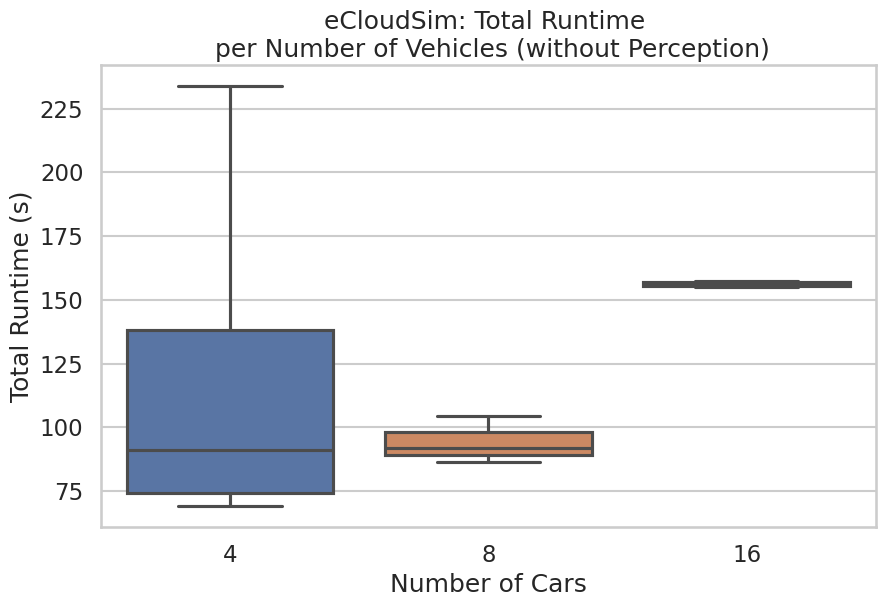

Saved file: ./evaluation_outputs/cumulative_stats_no_perception/step_time_boxplot.png


<Figure size 640x480 with 0 Axes>

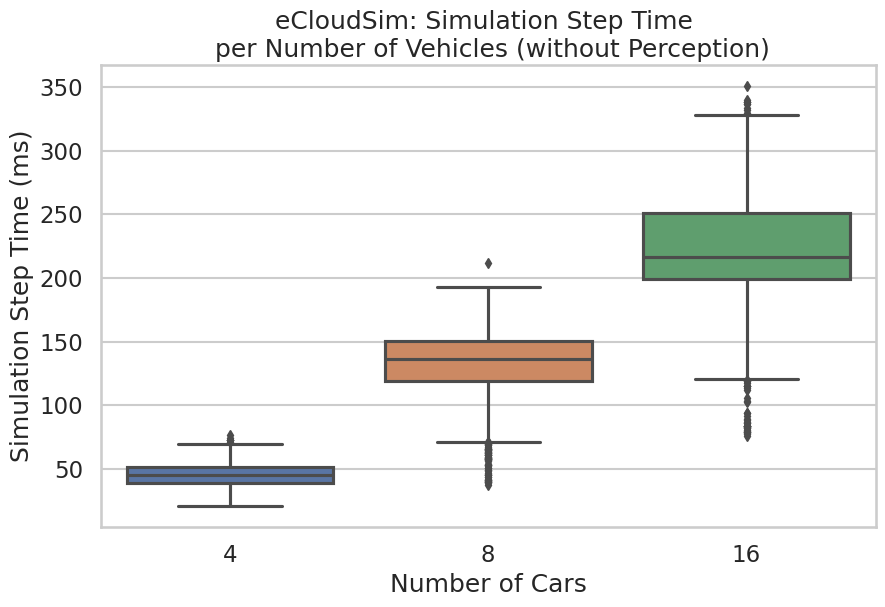

<Figure size 640x480 with 0 Axes>

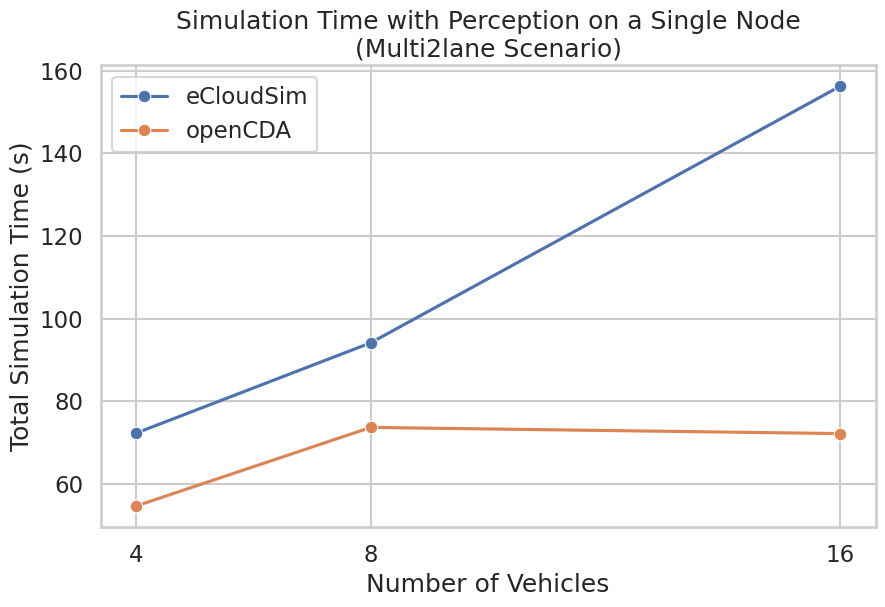

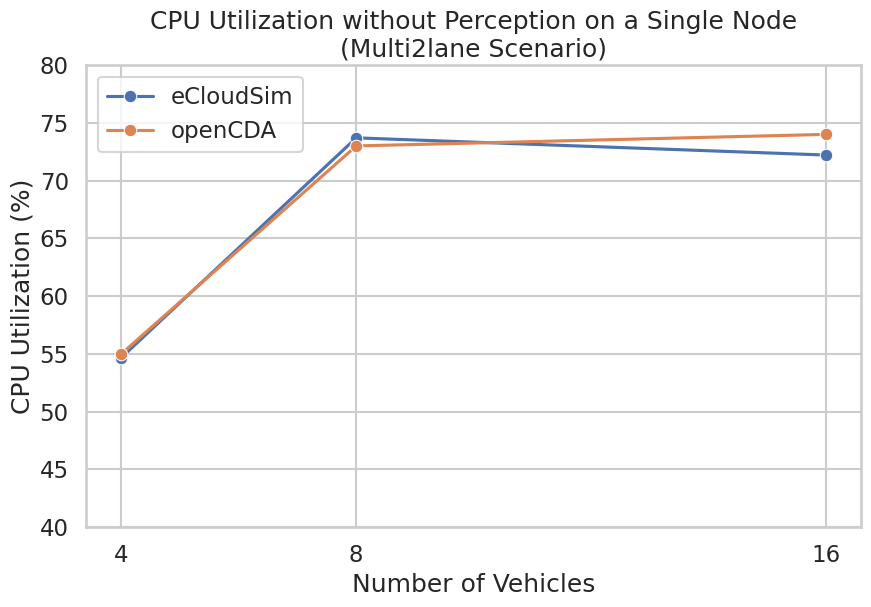

In [188]:
if __name__ == '__main__':
    # Plotting simulation total run time stats
    plot_simulation_time()

    # Plotting simulation step time stats
    plot_step_time()

   # Example DataFrame for comparison chart
    comparison_data = pd.DataFrame({
        'num_vehicles': [4, 8, 16],
        'eCloudSim': [72.3, 94.159503, 156.235791],
        'openCDA': [54.68, 90, 170]
    })

    # Plotting comparison chart
    plot_comparison_chart_time(comparison_data)

    data = {
        "Simulation": ["eCloudSim", "eCloudSim", "eCloudSim", "openCDA", "openCDA", "openCDA"],
        "num_vehicles": [4, 8, 16, 4, 8, 16],
        "cpu_util": [54.68, 73.70, 72.21, 55.00, 73.00, 74.00],
    }

    df = pd.DataFrame(data)
    plot_comparison_chart_cpu(df)